In [1]:
#|default_exp app

In [1]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
#|export
from fastai.vision.all import *
import gradio as gradio

def is_cat(x): return x[0].isupper()

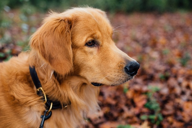

In [8]:
image = PILImage.create('dog.jpg')
image.thumbnail((192,192))
image

In [5]:
#|export
learn = load_learner('cat_or_dog.pkl')

In [11]:
learn.predict(image)

('False', tensor(0), tensor([1.0000e+00, 5.2462e-07]))

In [10]:
#|export
categories = ('Dog', 'Cat')

def classify_image(image):
    pred, idx, probs = learn.predict(image)
    return dict(zip(categories, map(float, probs)))

In [9]:
classify_image(image)

{'Dog': 0.9999995231628418, 'Cat': 5.246204182185465e-07}

In [11]:
#|export
image = gradio.inputs.Image(shape=(192,192))
label = gradio.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

interface = gradio.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
interface.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [17]:
from nbdev.export import nb_export

In [24]:
nb_export('Dogs vs Cats.ipynb')